# Introduction


Hello! Welcome on to a journey where we will predict rating for a given review(Board games- review). In this journey we will see how to handle a dataset, clean the data, understand the data, divide the data into sets, work on classifers, train it, build it and deploy it on Amazon AWS from where we will get a endpoint which we can call later while creating our cool predictor Application.




In [0]:
#Here are some of the imports which we will used in the whole process.
import numpy as np
import pandas as pd
import re
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score


In [0]:
pip install gensim

# Dataset Import


For this project we will we working on data set from kaggle https://www.kaggle.com/jvanelteren/boardgamegeek-reviews. From the data sources we will be only using "bgg-13m-reviews.csv". I have used google colab for working on dataset as it gives 25 gb of ram which is sufficient for these kind of programs.

In [0]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/bgg-13m-reviews.csv")

Now lets see how our data set and get some information about its shape

In [0]:
df.shape

(13170073, 6)

In [0]:
df.head(5)

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan


So till now we got the data loaded into our pandas data frame. <br> When you see the dataframe we derived, you would have thought what will we do with the columns like "index", "user","id","name" and rows which dont have any direct relation to reviews.<br>

Dont worry hang in there! Our next section will deal those issue, were we wil clean our dataframe and only keep content which we will be needing

# Data Cleaning


So the first step I would take will be removing the columns which I will not be that useful in predicting the rating. So lets remove those coulmns.

In [0]:
df =df.drop(columns=['ID','name','user'])
df = df.drop(df.columns[0],axis=1)


In [0]:
df.head()

,rating,comment
0,10.0,NaN
1,10.0,NaN
2,10.0,"Currently, this sits on my list as my favorite..."
3,10.0,"I know it says how many plays, but many, many ..."
4,10.0,NaN


Now we have only two columns left that are ('comment', 'rating') which will be used through out our journey. After removing the additional columns you would have noticed that there are many 'NAN' values which means that those rows wont be useful for our prediction, So now we have to drop those rows 

In [0]:
df = df.dropna()

In [0]:
df.head()

,rating,comment
2,10.0,"Currently, this sits on my list as my favorite..."
3,10.0,"I know it says how many plays, but many, many ..."
7,10.0,i will never tire of this game.. Awesome
11,10.0,This is probably the best game I ever played. ...
16,10.0,Fantastic game. Got me hooked on games all ove...


So now our data set is clean, but I can see that rating is in decimals which tells me that there is a possibility of having more then just 1-10 rating lets see how many unique rating we have.

In [0]:
np.unique(df['rating'])

array([1.40130e-45, 1.00000e-04, 1.00000e-03, ..., 9.99990e+00,
       9.99999e+00, 1.00000e+01])

In [0]:
len(np.unique(df['rating']))

3408

 it turns out to be large set of  unique rating values(3408 to be precise), hence to simplfy thing at our end lets convert these number into integer which will remover all the decimal rating leaving us only rating from 1-10 we will be also removing anything which shows the rating as 0 as that will be possibility from rating like 0.5 which if converted into int will give 0

In [0]:
df['rating'] = df['rating'].astype(int)
df = df[df.rating!= 0]

Now let see how again about the rating.

In [0]:

np.unique(df['rating'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:
print(len(np.unique(df['rating'])))

10


Volla!!! Now we got rating from 1 - 10, with only 10 unique values that mean 10 classifications, good job until now we have decreased our burden a bit, now lets see how big our dataset is and what further should we do.

In [0]:
df.shape

(2637745, 2)

 **2637745 ** is a very big number it might take us a lot of processing power to run functions, we will try to use all data but be aware that it will take a considerable amount of time to run the function which we will see ahead. If you guys want you can divide the data set into smaller parts but be aware that the division should be in two way Balanced and Unbalanced, in balanced every rating should have equal set of reviews in our sample dataset and in Unabalanced there is no need for rating to have equal number of instances in sample data set

With all the above steps done now we have a dataframe with comments and rating that we want. So its time to shift our focus to comments. The comments contains many words which will not be usefull for our prediction also we want to standardize the comments like removing punctutions, number and making all the letters lower case so that we can use each word of the comment in better way the following steps are for the reaching this goal



1.   Make all character in same case and remove all charcaters which are not alphabets
2.   Removing stopword

For stopword removal we have used Gensim and its default stopwords





> What are stop words?<br>
Stop word are the comonly used words which have a very high frequency of occurance, due to there high frequecy of occurance, they are not useful in natural language processing, hence we always try to remove stop words before we procces for any processing.




Before we proceed let see the the top 50 most repeated word in our dataset before cleaning. In this way we can understand the use of cleaning comments and removing stopwords

In [0]:
from collections import Counter
top50 = Counter(" ".join(df["comment"]).split()).most_common(50)
for i in range (0 , len(top50)):
  print(top50[i][0]+" - "+str(top50[i][1]))

the - 4029976
a - 2716255
to - 2629051
and - 2308501
of - 2089296
I - 1710274
game - 1560905
is - 1535676
it - 1220559
with - 1030393
but - 978253
in - 953105
for - 941430
this - 922737
that - 877324
you - 764801
The - 581758
game. - 574394
play - 556714
as - 553192
are - 546778
on - 491813
be - 488912
like - 477754
not - 475168
have - 470895
more - 455358
my - 432877
can - 390974
one - 349591
very - 330257
or - 313473
really - 312270
at - 306364
your - 305961
so - 305722
was - 300430
just - 288310
good - 277280
fun - 276482
A - 270707
This - 269343
game, - 268032
some - 265374
- - 261603
get - 261023
an - 260832
than - 257442
much - 254752
played - 243407


As you can see there are many vague word like The, I , that which usually wont have any effect it identfying the sentiment hence we should remove them and stopwords removing does the same

In [0]:
from gensim.parsing.preprocessing import remove_stopwords
TOKEN_REGEX = re.compile("[^A-Za-z ]+")
def clean_data():

  df['comment'] = df['comment'].str.lower()
  my_new_list =[]
  for val in df['comment']:
    val = re.sub(TOKEN_REGEX, '', val)
    val = remove_stopwords(val)
    my_new_list.append(val)

  df['cleaned_comment'] = my_new_list 

In [0]:
#the following function will clean the comments by removing all characters except alphabets and then remove stopword as well.
clean_data()

Now we have removed the stop words and cleaned comment let me show you the impact in visual way, we will be using wordcloud help to demonstrate 

In [0]:
from collections import Counter
top50 = Counter(" ".join(df["comment"]).split()).most_common(50)

s1 = []
for i in range (0 , len(top50)):
  s1.append(top50[i][0])
  s1.append(" ")

s = ''.join(s1)

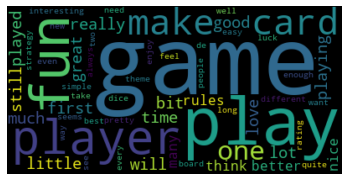

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
wordcloud = WordCloud().generate(s)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

See now it makes more sense that we got word which really hold value in determining the sentiment.

Now just to show the differnece between our comments before and after cleaning we have the below table, you can see the comments are now very much precise and thats what we want our predictions to be based upon

In [0]:
df.head()

,rating,comment,cleaned_comment
2,10,"currently, this sits on my list as my favorite...",currently sits list favorite game
3,10,"i know it says how many plays, but many, many ...",know says plays uncounted liked version best
7,10,i will never tire of this game.. awesome,tire game awesome
11,10,this is probably the best game i ever played. ...,probably best game played requires thinking de...
16,10,fantastic game. got me hooked on games all ove...,fantastic game got hooked games


After cleaning the comments there might be some rows comments which may have be empty so now again we will run dropna function so that we remove all of those empty values rows.

In [0]:
df.dropna()
df.shape

(2637745, 3)

As we wont be using the comment columns we will drop it and make our cleaned_comment columns as comment column

In [0]:
df['comment']= df['cleaned_comment']

df =df.drop(columns=['cleaned_comment'])


In [0]:
df.head()

,rating,comment
2,10,currently sits list favorite game
3,10,know says plays uncounted liked version best
7,10,tire game awesome
11,10,probably best game played requires thinking de...
16,10,fantastic game got hooked games


# Dataset Partition and visualization

In This section we will be dividing out dataset into test and train sets, there will be to types of division one which will divide the data set in 2 parts and the other which will divide the dataset in 4 parts.
The data set is divided in the ration of 75% train to 25% test. 

In [0]:
train_data, test_data, _ = np.split(df.sample(frac=1, random_state=40), [int(0.75 * len(df)), int(len(df))])  


We will use train_test_split function from sklearn which helps us didvide our dataset as well as shufle it, by which we will get Unbalanced data set

In [0]:
from sklearn.model_selection import train_test_split
x = df.comment
y = df.rating
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                  stratify=y, 
                                                  random_state=40, 
                                                  test_size=0.25, shuffle=True)

One of my intution was to somehow understand the prediction for each rating level so lets visualize that with the help of a plot

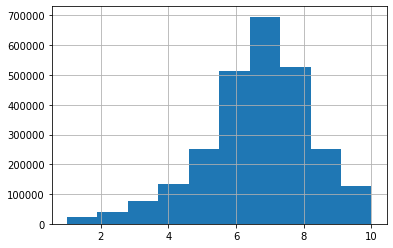

In [0]:
df['rating'].hist();

So now we can see that most of the review are between rating 6-8 lets us move a bit further and see how well we be doing with each rating using basic navie bayes classifier for which I created the following data frame which will now be usefull to undertsand how well we are predicitng for each rating.

In [0]:
train = pd.get_dummies(train_data, columns = ['rating'])
train.head()

,comment,rating_1,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
10633648,wargames simple fun wargame,0,0,0,0,0,1,0,0,0,0
6325302,donated game better card additions stands prob...,0,0,0,0,0,1,0,0,0,0
9333860,lot playtime went game enjoyed building fleet ...,0,0,0,0,0,0,0,1,0,0
6359648,downside game far im concerned headache time t...,0,0,0,0,0,0,0,0,0,1
3838898,good rulebook plays reasonably fast elegant,0,0,0,0,0,0,0,0,1,0


In [0]:
test = pd.get_dummies(test_data, columns = ['rating'])
test.head()

,comment,rating_1,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
6480188,great solid simple mechanics lots variety opti...,0,0,0,0,0,0,0,1,0,0
1129772,foamcored,0,0,0,0,0,0,1,0,0,0
3122869,quickly moving ladder haha games time surprise...,0,0,0,0,0,1,0,0,0,0
8196323,rate players players,0,0,0,0,0,0,0,1,0,0
10280183,fans xx series game little difficult swallow p...,0,0,0,0,0,0,0,1,0,0


# **Naive Bayes**

Naive Bayes classifiers are linear classifiers that are known for being simple yet very efficient.
There are few reasons why I choose to implement naive bayes. It doesn’t require as much training data.It is highly scalable with the number of predictors and data points.It is fast and can be used to make real-time predictions. It is not sensitive to irrelevant features. Hence we will be trying to predict using navie bayes, also we will try to check each rating cross validation score so that we can understand more carefully on how good we can predict each rating





> What is Naive Bayes classfication?<br>
You can say its a classification based on Baye's theorem and half of the marks should be given for that ;) But for the rest half you should know what bayes theorem is. So lets understand bayes theorem and from then it would be a cake walk. 
<br>
Bayes theorem helps us to find contional probability for example there are two events one is Fire and the other one is Smoke now if you want to find the probabiliyt of having Fire when there is smoke you can use the following formula.
<br>![alt text](https://sameerpvs.uta.cloud/nb.PNG)<br>
So I wont go to detail but I guess that I have given a pretty good idea on what it.Now coming to our classifier we sorted why its called Bayes now lets see why its called Naive, because of the independent nature it uses also taken into consideration how simple the logic behind this is you will also call it naive :)<br> So for example if you define a  Mango something like which is yellow shade in color, 2-4 inches in size and is in kind of eliptical shape. These feature together make it an orange but all these proprties independently contribute the probability the fruit is mango. Hence because of this is known as Naive.
<br>




 So we finally got an broad idea how this Classifier is going to work lets roll and see the implementation part.


So before implementing I would like take a moment let you all understand about TF -IDF which we will be using in the next step. 


**Term Frequency (TF)**
The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency

**Inverse Data Frequency (IDF)**
The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

**Why Use TFIDF?**
*   It is very efficient.
*   From the research, many scholars have proven the TF-IDF document which is highly relevant to query.
*   Easy to compute the problem.
*   Have some basic metric to extract the descriptive document.
*   Easily compute the similarity between the documents using it.

So now as I have given you text book defination let me tell you in my way what will the next two line do.

In [0]:
max_features = 2000
tfidf = TfidfVectorizer(max_features = max_features)

Now as we have got our tfidf lets create a Pipeling and fit the model leveraging SKlearn capabilties, So what pipleine does it makes the program run one after other, same like how water goes from a pipe. Remeber we will be using pipeline throughout our journey.

In [0]:
p_nb = Pipeline([  
                 ('tfidf',TfidfVectorizer()),
                 ('clf', nb)])
p_nb.fit(x_train,y_train)
pred = p_nb.predict(x_test)

Accuracy visualization for naive bayes with tfidf

In [0]:
nb_tfidf_accuracy = accuracy_score(y_test, pred)

0.2849991735374266

So the accuarcy is bit low but considering the 10 classes we have we were expecting the same but that not enough lets try something different we will use count Vectorizer this time and check the accuracy.

In [0]:
nb =MultinomialNB()
p_nb_cV = Pipeline([
                 ('vect', CountVectorizer()),
                 ('clf', nb),])
p_nb_cV.fit(x_train,y_train)
pred_cV = p_nb_cV.predict(x_test)

Accuracy visualization for naive bayes with countVectorizer

In [0]:
nb_cv_accuracy= accuracy_score(y_test, pred_cV)

0.31173561689744433

Like shown above, The accuracy for naive bayes is higher if there is no TFIDF used. I have explored some of the reasons for this and they are following:
*   TFIDF assume the count of different words that provide independent evidence of the similarity.
*   It makes no use of similarities between the words.

So for now our highes accuracy is 31%

Now I would like to dive deep and understand a bit more and go on with my intution of trying to understand about each rating prediction so that we can have an idea on how our model is working on finer details

In [0]:
def displayFunc(train, test,p):
  class_names = ['rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5','rating_6', 'rating_7', 'rating_8', 'rating_9', 'rating_10']
  scores = []
  preds = np.zeros((len(test), len(class_names)))
  for i, class_name in enumerate(class_names):
      train_target = train[class_name]  
      cv_score = np.mean(cross_val_score(estimator = p, X = train['comment'].values, y = train_target, cv = 2, scoring = 'accuracy'))
      scores.append(cv_score)
      print('CV score for class {} is {}'.format(class_name, cv_score))
      p.fit(train['comment'].values, train_target)
      preds[:,i] = p.predict_proba(test['comment'].values)[:,1]

In [0]:
nb =MultinomialNB()
p = Pipeline([
     ('td',tfidf),       
    ('nb', nb)
])
displayFunc(train, test,p)

CV score for class rating_1 is 0.9920042784035651
CV score for class rating_2 is 0.9847490886151196
CV score for class rating_3 is 0.9711015676022136
CV score for class rating_4 is 0.9495088732391519
CV score for class rating_5 is 0.9045871522533397
CV score for class rating_6 is 0.8053351652017785
CV score for class rating_7 is 0.736415664294943
CV score for class rating_8 is 0.7999158877181916
CV score for class rating_9 is 0.9047276763779957
CV score for class rating_10 is 0.9516536353287759


So with the above result we should be happy :) but remember in mind that having 99% cv score for rating_1 does mean we are getting accuracy of 99% for the model it just says that our model can predict rating with 1 value 99% correctly however as shown in the prior graph the number of reviews for 1 rating are less so that helps the cv score, compared to the cv score of rating 6,7,8 we have decerase in predictablity but still considering the simplicity of navie bayes we can fairly assume that the prediction and accuracy we got from Navie Bayes are very good, Still for understanding and seeing how other classifer works we will trying on them and see there predictions and we might even tune them

# Ridge Rigression

Ridge regression, as the name suggests, is a method for regression rather than classification. Presumably I'm using a threshold to turn it into a classifier.The reason for it is working is because the task at hand is essentially linearly separable - i.e. a simple hyperplane is all that is needed to separate the classes. The "ridge" parameter allows it to work in cases that are not completely linearly separable or problems which are rank deficient.

The Reasons I choose ridge regression are: Ridge regression adds just enough bias to make the estimates reasonably reliable approximations to true population values.One important advantage of the ridge regression is that it still performs well, compared to the ordinary least square method in a situation where there is a large multivariate data

In [0]:
from sklearn.linear_model import RidgeClassifier
p_rg = Pipeline([('vect', CountVectorizer()),
('clf', RidgeClassifier()),])
p_rg.fit(x_train,y_train)
pred = p_rg.predict(xtest) 

In [0]:
rg_accuracy = accuracy_score(y_test, pred)

0.3022305390810646

we got pretty good accuracy with ridge regressing but Naive Bayes still lead, so lets move on to our next trail which will be SVC

# Support Vector Classification

Support vector machines is an algorithm that determines the best decision boundary between vectors that belong to a given group (or category) and vectors that do not belong to it.

Coming to the  reason I choose SVM is: It can be applied to any kind of vectors which encode any kind of data. As the data used is already converted to vectors, the SVM is highly effective.A small change to the data does not greatly affect the hyperplane and hence the SVM.

In [0]:
from sklearn.svm import SVC
p_svc = Pipeline([('vect', CountVectorizer()),
('clf', SVC(gamma='auto')),])
p_svc.fit(x_train,y_train)
pred = p_svc.predict(x_test)

In [0]:
svc_accuracy = accuracy_score(y_test, pred)

0.2548

Unfortunately, SVM did not perform well compared to other classifiers. I have looked for reasons why and they are below:
*   SVMs are not very efficient computationally, if your dataset is very big, such as when you have more than one thousand rows.
*   Algorithm is prone for over-fitting, if the number of features is much greater than the number of samples.

SO dont worry we will still try some more and check if we can beat Naive Bayes

# SGD Classifier
This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule.
supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme. For each of the  classes, a binary classifier is learned that discriminates between that and all other  classes.


In [0]:
from sklearn import linear_model
p_sgd = Pipeline([('vect', CountVectorizer()),
('clf', linear_model.SGDClassifier(max_iter=1000, tol=1e-3))])
p_sgd.fit(x_train,y_train)
pred = p_sgd.predict(x_test)

In [0]:
sgd_accuracy = accuracy_score(y_test, pred)

0.27662536375726565


Oh Darn!, we got less accuracy this time as well but its better than SVC, now I have looked for reasons why SDG classifier is not working.<br>
My assumptions less accuracy is : Stochastic Gradient Descent (SGD) requires several hyperparameters like regularization parameters.It is sensitive to feature scaling, hence as we have used pretty standard out of box function we might have got less accuracy but for now I wont be dwelling into this but will rather move on to my next classifier 

# Xgboost
This has become a popular algorithm in recent days. I read it somewhere in Kaggle network.
Basics:
The implementation of the algorithm was engineered for efficiency of compute time and memory resources. A design goal was to make the best use of available resources to train the model. Some key algorithm implementation features include:
Sparse Aware implementation with automatic handling of missing data values.
Block Structure to support the parallelization of tree construction.
Continued Training so that you can further boost an already fitted model on new data.

2 main reasons I choose Xgboost are: Execution Speed and Model Performance.

In [0]:
import xgboost as xgb
from sklearn import linear_model
p_xgb = Pipeline([('tfidf', tfidf),
('clf',  xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1))])
p_xgb.fit(x_train,y_train)
pred = p_xgb.predict(x_test)

In [0]:
xgb_accuracy = accuracy_score(y_test, pred)

0.27

Ah ! Again it did show us quite convencing results but it was good to know classifer. But remeber naive bayes is still leading lets see if logistic regression can beat it 

# Logistic Regression


> What is logistic regression ?<br>Logistic Regression measures the relationship between the dependent variable (our label, what we want to predict) and the one or more independent variables (our features), by estimating probabilities using it’s underlying logistic function.


Logistic Regression Model is a generalized form of Linear Regression Model. 

It is a very good Discrimination Tool. Following are the reasons of choosing Logistic Regression:

Logistic regression is less prone to over-fitting but it can overfit.It does not require too many computational resources. it is highly interpretable. It doesn’t require input features to be scaled

In [0]:
from sklearn.linear_model import LogisticRegression
p_lg = Pipeline([('vect', CountVectorizer()),
('clf', LogisticRegression(max_iter=120000000))])
p_lg.fit(x_train,y_train)
pred = p_lg.predict(x_test)

In [0]:
accuracy_score(ytest, pred)

0.2750666666666667

So logistic regresion still hasnt crossed over prediciton level which Naive Baye set, Let stop here and visualize the accuracy of all the classfiers we got still now then remeber we will be selecting a model and then deploy it to make our cool predicitor app.

# Final Visualization & Model Selection

So now lets plot an graph to compare all the accuracy we got till now and then we will decide the model which we will use to test or rating.

In [0]:
accuracies = [nb_tfidf_accuracy,nb_cv_accuracy,rg_accuracy,svc_accuracy,sgd_accuracy,xgb_accuracy,lr_accuracy]

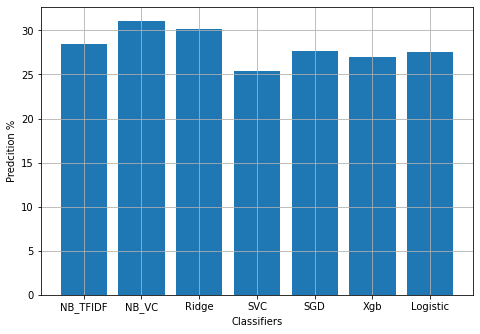

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifiers = ['NB_TFIDF', 'NB_VC', 'Ridge', 'SVC', 'SGD','Xgb','Logistic']
prediction = accuracies
ax.bar(classifiers,prediction)
ax.set_ylabel('Predcition %')
ax.set_xlabel('Classifiers')
ax.grid(zorder=0)
plt.show()

So for above bar chart we can see that Naive Bayes with Count vector has the highes accuracy so we will choose that classifier and create the model.

In [0]:
nb =MultinomialNB()
final_p = Pipeline([
                 ('vect', CountVectorizer()),
                 ('clf', nb),])
final_p.fit(df['comment'],df['rating'])

In [0]:
def predictRating(text):
    cleaned_text = clean_text(text)
    ls=[cleaned_text]
    rating = final_p.predict(ls)
    return rating[0]


def clean_text(text):

  TOKEN_REGEX = re.compile("[^A-Za-z ]+")
  text = re.sub(TOKEN_REGEX, '', text)
  text = remove_stopwords(text)
  return text;

In [0]:
text = "it is not that great. but i can say average game."
print(predictRating(text))

7


So finally we have come to end of building a model, the accuracy is not the best however for learning environment and considering it to be first time I have ever tried to build something like this I feel it good for now. But please dont hesitate to send in your feedback if on how we can increase our accuracy. My contact information will be avaliable at the bottom.

Let move on the part where will deploy our model :) and make the cool predicitor application

# Deployment

So finally now we have a model ready and as I have said in the starting we will also see how to create a cool web app where we will try to predict rating on a given preview<br>
There are many way we can deploy the model and create an web app but today we will learn how to deploy a model in Amazon Web Services.<br>
Before we proceed further let me tell you the reason why I choose AWS. AWS provides you with a very robust network and the downtime of AWS is almost 0 hence I choose AWS.<br>

Let me now tell you the broad Idea on how we will procced towards building application.<br>

1. We will deploy the model in aws which after running some aws script will give us an endpoint.(API endpoint)
2. Once we have an endpoint it very simple, we will just need an html and javascript code which will perform POST method call to our API (sending review text to be predicted) and the recieve a response which will have our predeicted rating.


To achieve above steps we have will be creating JOBLIB file for our model. For people who dont understand what JOBLIB file is just think it of as a briefcase which contains all the information which we have proccesed till now and which is very easy to carry.
Now we will deploy the JOBLIB file in AWS Sagemaker. AWS Sagemaker is amazon wing for DATA processing works. To deploy this JOBLIB file there is a very basic amazon scipt that can be found in AWS document which link will be given below.

Once you run that code you model will be deployed and an ENDPOINT will be created where you can send your Review Text and rating will be given out in response.

After creating endpoint in sagemaker you can only use the endpoint or API call from sagemaker environment only. But this doest help us in creating our web app hence we need to make a way do that our endpoint can be contacted from outside of AWS environemnt. To do so we have to follow these steps.

1. Create a lambda function in AWS and make a connection from the function to our sagemaker endpoint
2. Create a API in AWS API Gateway Console which will have capabailities of POST method and will be invoking our lambda function.

Once the above steps are done we will have Link ready to which if we send an request with our review text we will get rating as response.

I have done the above steps and the code for lambda function is given below.

Now we have done most of the heavy work We just will create an HTML Page which will have have an input box and once user Enters text and clicks button we will send the text to our API and will show the response to the user.

To Summarize the whole Application it works something similar to the following diagram.

<br>


![alt text](https://sameerpvs.uta.cloud/deploy.PNG)

So are you ready to try out the web app ????
<br>

I know your are :) Please click [here](http://saikumarreddymokkala.uta.cloud/predict.html) to try out the app. Please remember to give in reviews as normal human :P so that you will get good rating prediction.

# Contribution 

If someone asks me about my sole contribution towards this project apart from the refernce I would say that trying to work with different classifiers, checking Navie Bayes with tfidf and with CV, writing function in navie bayes where we were able to get cross validation score for each rating were my main contributions however I would like to say that I have by myself understood the implementation of all the Sklearn function and have use them through out the project and my contirbution part increases siginificantly in the are of creating Webapp. I myself wrote a code in amazon aws lambda function where the function recieves call from API gateway and then it reach out to the endpoint in sage maker takes the response and send back, also the code written as front end for the application is a pure contibution from my end. 

# Challenges

Coming to challenges there we were so many when I started of this project from understanding how to import data to choosing where to deploy the project. Let me illustarte some of challenges which really took a lot of time and effort from my side to overcome them.


> Dont worry! There is Overcoming Challenegs section as well so that you guys can learn from my experience.

So the challenges were :- 
1. Understanding of the dataset. The data set was very huge and from kaggle boardgamegeek review dataset, we obtained data with diffrent files and each having a massive ammount of data.
2.  Cleaning the dataset
3. Understanding the implementation of different classifiers on the data
4. How to visualize the data and select which classfiers to use
5. How to deploy the model so that we can use it in real time scenario 



# Overcoming Challenges

So now here we are, where i will tell you how I over come the above mentioned challenges.
1. Dataset issue: So the data was large but after througly checking I found that there are only two cloumns we will be using at most and if I could somehow just have those columns and remove the rest it will be half work then. Then came the problem of running these heavy function on the dataset beacuse of the usual less ram we have in our systems we I ran intp trouble many time as my notebook keep on closing. So for that google Colab came very handy. I suggest people to use it and it gives you 25 gb of ram which is quite sufficent to run these kind of programs
2. Now the dataset has lot NAN values and the coments were very vague I had to clean data set by removing all the punctuations which people leave in review and also drop the rows which didnt had any values that made the dataset more clean and easy to process.
3. So thanks to my course work I had an idea on how KNN, Navie Bayes, Emsemble method work but I wanted to learn more classfiers as I could see people using then in other Competetion so I enrolled in a course at Udemy where brief summary of different classfiers and their working were given
4. So due to the dataset being so big, I was not sure on what should be visualized and what should be considered important. So, I had to refer many resources from internet.
5. SO deploying model was the most tricky part and consumed the most time throught out the project, I was inclined to use PythonAnyWhere as my webserver but dues to flask being some new language which I didnt have any experience on I tried searching for alternative and then while I saw an app deployed in Booklet.io I realized that creating endpoint and using them was the best solution for this scenario and After doing my bit of research and completeing the app it was a great learnig.

# Outcome

It been a real roller coaster ride throught out the project. The time I started this project almost a month back I was blank on many topic which I have a very great understanding now. For learning how to use basic python features to implementing a model everything was learnt beacause of this project. I mainly focused on how Naive Bayes work, how to get most of it. Learning sklearn library and understanding how they work on data, playing with the parameters, tuning the model so we get more accuracies these all thing have given me quite an understanding of how real world data is analyzed using the conceptual model we study in our Course work. I would also say that asking us to create a web Application was one of a great way to make us understand the practical use of these models and on the journey of creating application I learnt a lot on how AWS work, how important are API's and how endpoint work. <br>


Finally it been a great learning curve and I really enjoyed doing this project.

# Refernces

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://stackoverflow.com/questions/23357798/how-to-draw-grid-lines-behind-matplotlib-bar-graph
https://www.mathsisfun.com/data/bayes-theorem.html
https://scikit-learn.org/stable/modules/naive_bayes.html
https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle
https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
https://scikit-learn.org/stable/modules/ensemble.html#stacked-generalization
https://matplotlib.org/tutorials/introductory/pyplot.html